## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\grishma.shaw\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 47s 29s/step - loss: 6.9727 - accuracy: 0.3594 - val_loss: 3.8640 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 29s 20s/step - loss: 6.1723 - accuracy: 0.3125 - val_loss: 9.7584 - val_accuracy: 0.2069
Epoch 3/50
2/2 [==============================] - 31s 23s/step - loss: 7.8382 - accuracy: 0.4375 - val_loss: 15.0426 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 38s 28s/step - loss: 9.7936 - accuracy: 0.3906 - val_loss: 7.4669 - val_accuracy: 0.3448
Epoch 5/50
2/2 [==============================] - 36s 23s/step - loss: 4.2949 - accuracy: 0.4844 - val_loss: 3.2908 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 33s 24s/step - loss: 2.9007 - accuracy: 0.4531 - val_loss: 4.6291 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 35s 25s/step - loss: 4.7562 - accuracy: 0.3906 - val_loss: 1.6519 - val_accuracy: 0.6034
Epoch 8/50
2/2 [==========

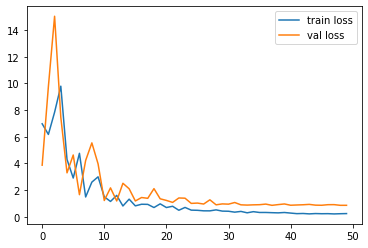

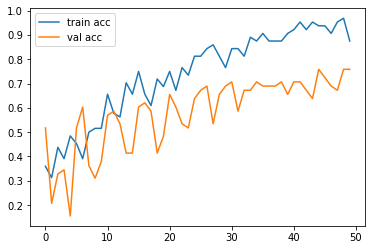

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\grishma.shaw\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[5.25829315e-01, 1.00566819e-01, 3.73603851e-01],
       [8.72523896e-03, 9.15452182e-01, 7.58226067e-02],
       [3.03292051e-02, 8.89861643e-01, 7.98092186e-02],
       [1.15371376e-01, 5.36602080e-01, 3.48026514e-01],
       [8.38541925e-01, 1.25214651e-01, 3.62433940e-02],
       [1.01723550e-02, 5.80652297e-01, 4.09175277e-01],
       [1.27073079e-01, 3.25640887e-02, 8.40362847e-01],
       [2.42050048e-02, 6.40725851e-01, 3.35069269e-01],
       [5.38400337e-02, 4.78377042e-04, 9.45681572e-01],
       [1.03537412e-02, 8.08282733e-01, 1.81363583e-01],
       [1.14803544e-04, 9.98486996e-01, 1.39809935e-03],
       [3.01599335e-02, 8.46194744e-01, 1.23645283e-01],
       [1.93395428e-02, 7.32668638e-01, 2.47991815e-01],
       [7.96359591e-03, 6.97884619e-01, 2.94151783e-01],
       [2.94436831e-02, 7.35484242e-01, 2.35072091e-01],
       [1.24858478e-02, 9.73470569e-01, 1.40436254e-02],
       [3.77460234e-02, 4.77469534e-01, 4.84784424e-01],
       [4.72121418e-01, 4.63726

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=0)

In [22]:
y_pred

6

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.h5')

In [25]:
img_data

NameError: name 'img_data' is not defined

In [93]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [94]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [ ]:
x.shape

In [96]:
x=x/255

In [26]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

TypeError: Cannot convert a symbolic Keras input/output to a numpy array. This error may indicate that you're trying to pass a symbolic value to a NumPy call, which is not supported. Or, you may be trying to pass Keras symbolic inputs/outputs to a TF API that does not register dispatching, preventing Keras from automatically converting the API call to a lambda layer in the Functional Model.

In [98]:
model.predict(img_data)

array([[0.02122196, 0.49325418, 0.4855238 ]], dtype=float32)

In [100]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])